<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/02_06_Image_basic_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 2-6: Image Processing
> ## Image Augmentation

## Module import

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# tf.keras.preprocessing.image import
import tensorflow.keras as keras 

## get image from flower photos

### image load

path : /root/.keras/datasets/flower_photos <class 'pathlib.PosixPath'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F765C2765C0>




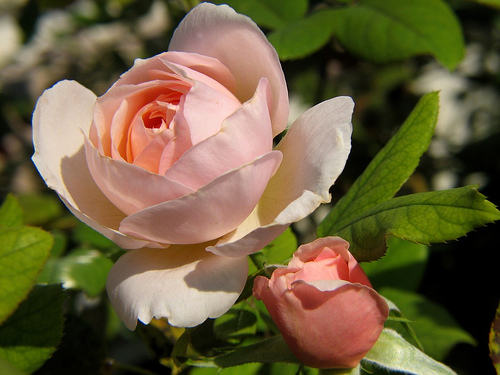

In [0]:
# URL에서 이미지 읽어와서 준비 
import pathlib

data_dir = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos', untar=True)
data_dir_tf = pathlib.Path(data_dir)
print ("path :", data_dir_tf, type(data_dir_tf))

roses = list(data_dir_tf.glob('roses/*'))
img = keras.preprocessing.image.load_img(roses[0]) 
print(img, end='\n\n\n')
img

### image processing function
#### -- inputs
>dg: ImageDataGenerator   
>imgs: image tensor


In [0]:
# image data generator로 부터 image를 받아서 출력 
def k_image_process(dg, imgs):

  # batch_size 만큼씩 처리하도록 준비 - ImageGenerator의 메소드 flow
  it = dg.flow(imgs, batch_size=1)
  plt.figure(figsize=(12,9))

  # generate samples and plot
  for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    #batch_size씩 가져옴
    batch = it.next() 
    # plt을 위해 type 변경 
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)

  # show the figure
  plt.show()

### image preprocessing: 3-dim to 4-dim array



In [0]:
# ImageDataGenerator()에 넣을 수 있도록 (batch size, height, width, channel)로 변환

# convert to numpy array - img_to_array라는 메서드가 있네 ㄷㄷ
data = keras.preprocessing.image.img_to_array(img)

print(type(data), data.shape)

# expand dimension to one sample
batch_image = np.expand_dims(data, 0)   # axis 0, 즉 가장 앞의 dimension을 추가시켜주는 것!! (1로)
print(type(batch_image), batch_image.shape)

<class 'numpy.ndarray'> (375, 500, 3)
<class 'numpy.ndarray'> (1, 375, 500, 3)


## Image Augmentations

### horisontal shifting: `width_shift_range` 

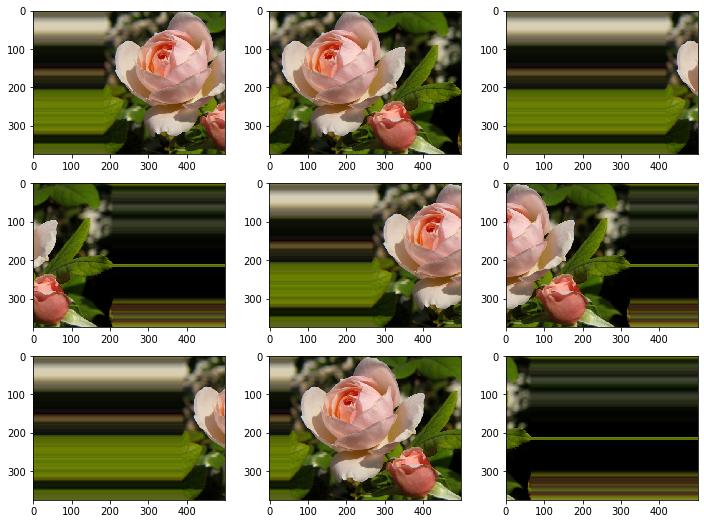

In [0]:
# width_shift_range
datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.9) # %개념이므로 0 ~ 1사이!

k_image_process(datagen, batch_image)

### virtical shifting: `height_shift_range`

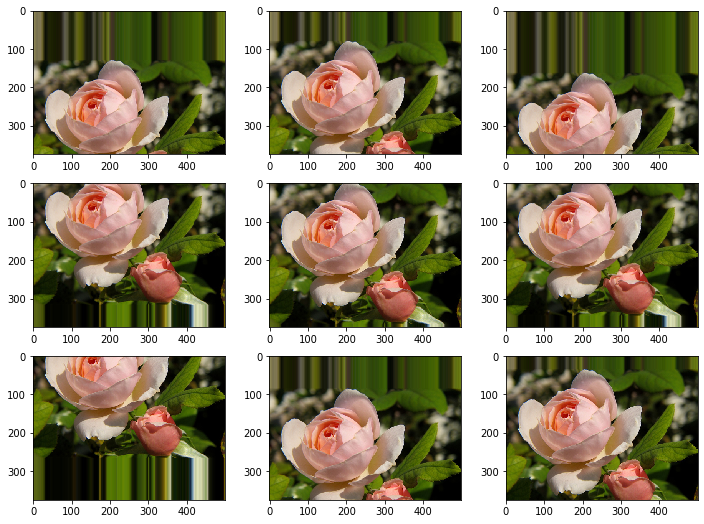

In [0]:
# height_shift_range
datagen = keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.5) # %개념이므로 0 ~ 1사이!
k_image_process(datagen, batch_image)

### Image flip: `horizontal_flip/vertical_flip`

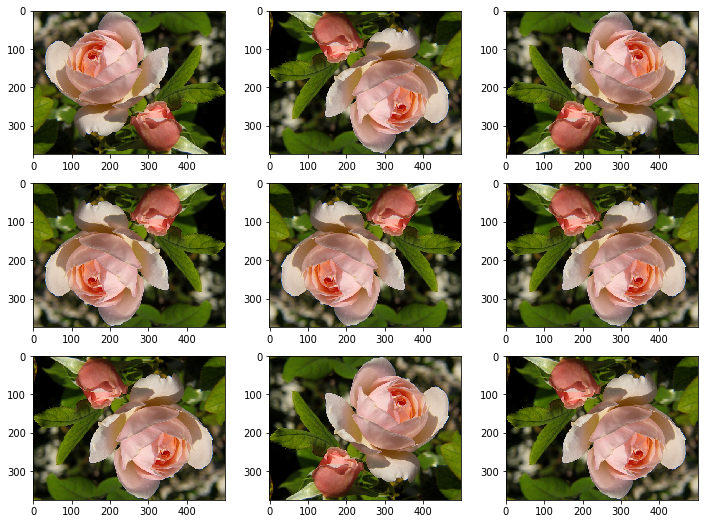

In [0]:
# flip
datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)  # 반전
k_image_process(datagen, batch_image)

### Image 회전: `rotation_range`

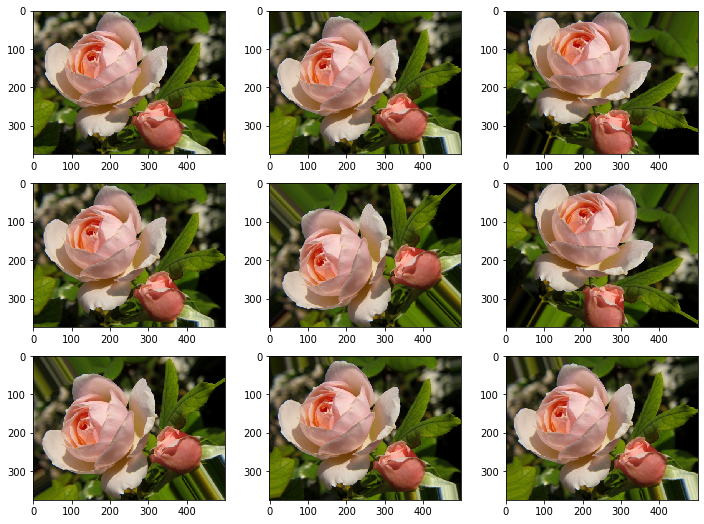

In [0]:
# rotation
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=45) # 각도!
k_image_process(datagen, batch_image)

Image 확대/축소: `zoom_range`

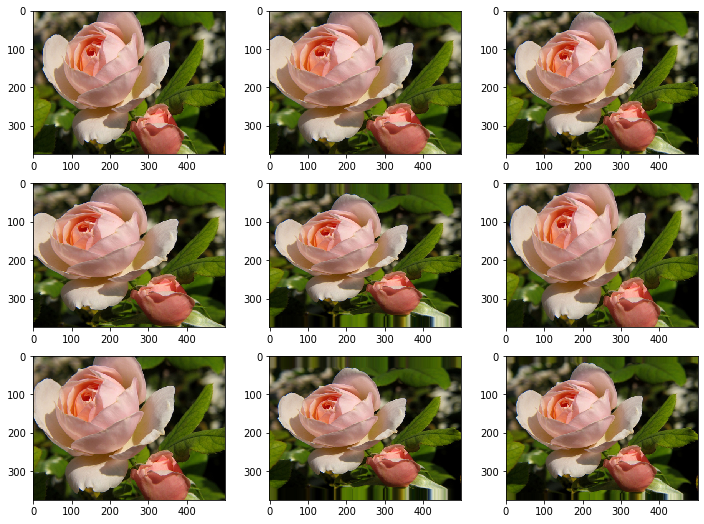

In [0]:
# zoom_range
## zoom_range=0.2 : +-20% 이내에서 random 
## zoom_range=[0.8,1.2] : 80% ~ 120% --> 100% 로 random
datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2) # zoom_range=[0.8,1.2]
k_image_process(datagen, batch_image)

### Image 밝기 변환: `brightness_range`

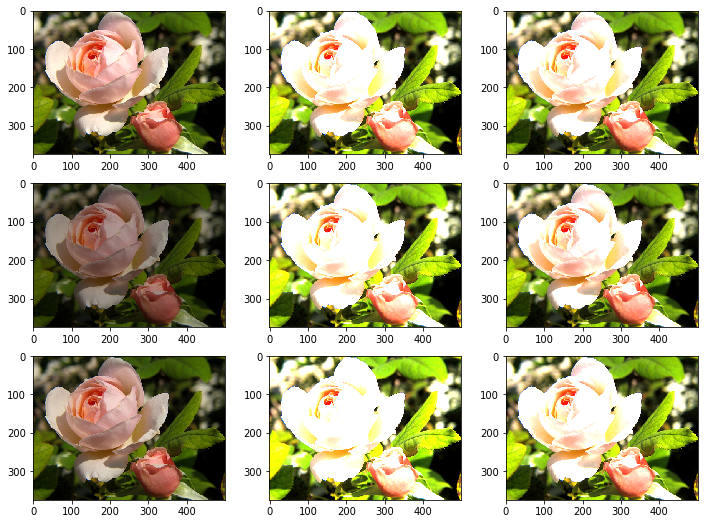

In [0]:
# create image data augmentation generator
datagen = keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.1, 3.0])
k_image_process(datagen, batch_image)

## **실습 과제**

### 과제 1. `ImageDataGenerator()`의 option 값들 바꾸어 결과를 확인하자
### 과제 2. `ImageDataGenerator()`에 여러 option을 넣어 동시에 작동하도록 해보자
###  -- `k_image_process()`를 수정하여 4x3 으로 이미지를 출력해 보자 
#### -- 결과를 확인 하자 : 

